Задание 2. Классы и граф.
Цель: Найти кратчайший путь и его длину между объектами классов.
Описание: Требуется создать родительский класс "Географическая точка" с обязательным атрибутом ID вершины (можно добавить дополнительные атрибуты, методы), от которого нужно наследовать различные подклассы географических объектов, например Здание, Остановка, Парковка и т.д. со своими особенными атрибутами/методами, например Этажность для зданий, Число маршрутов для остановок и т.д.
Далее нужно создать граф с не менее 10 вершинами, между которыми будет рёберная связь, сгенерированная вручную или случайным образом. Каждое ребро должно иметь свой вес (длину). Все вершины ранее созданных подкласcов географических объектов должны принадлежать этому графу.
Требуется создать несколько объектов подклассов географических точек и найти кратчайшие пути между ними в построенном графе.
Результат выполнения: граф в графическом или текстовом виде, вывод информации о кратчайшем пути и его длине между всеми парами созданных географических объектов: <Объект 1 (его атрибуты)> -> <Объект 2 (его атрибуты)>: список вершин, длина пути
Основные библиотеки:
    • networkx – для создания и обработки графа

Импортируем библиотеки

In [1]:
from dataclasses import dataclass
import networkx as nx
from typing import List

Создаем родительский и дочерние классы. Создаем объекты подклассов. Создаем граф.

{(1, 2): Text(0.18859236627804601, -0.3741288199644735, '3'),
 (1, 3): Text(0.16630865539036005, 0.15023730976396527, '1'),
 (1, 4): Text(0.22586130500841242, -0.004583970238307464, '4'),
 (1, 6): Text(0.009208644594538906, -0.02122359230708601, '6'),
 (1, 9): Text(0.3272503385895809, -0.43472158296065605, '7'),
 (2, 5): Text(0.059379064099461996, -0.31640297171378334, '5'),
 (2, 9): Text(0.29089092028713504, -0.605979691023241, '9'),
 (3, 4): Text(0.16721817581828058, 0.34852405142754633, '2'),
 (3, 5): Text(0.037095353211776046, 0.20796315801465542, '5'),
 (3, 11): Text(0.1250013134562202, 0.6781316053379578, '12'),
 (4, 6): Text(0.010118165022459435, 0.1770631493564951, '6'),
 (6, 7): Text(-0.4456095397771196, 0.24487202257132162, '8'),
 (7, 8): Text(-0.8423422920814125, 0.3887823000877728, '11'),
 (9, 10): Text(0.5353678572130255, -0.8261387271174979, '10')}

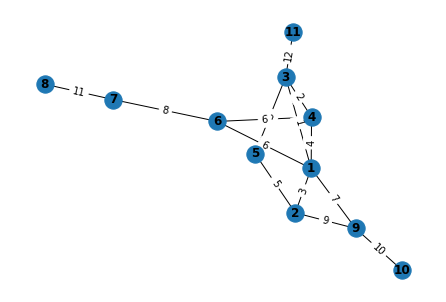

In [2]:
@dataclass
class GeographicalPoint:
    id: int
    latitude: float
    longitude: float


@dataclass
class House(GeographicalPoint):
    floors: int
    has_gym: bool


@dataclass
class Garage(GeographicalPoint):
    numbers_of_car: int


@dataclass
class GasStation(GeographicalPoint):
    gas_storage: int
    diesel_storage: int


@dataclass
class Mall(GeographicalPoint):
    has_parking: bool
    shops: int


my_house = House(1, 45.65, 45.73, 2, True)
private_garage = Garage(2, 75.43, 77.82, 35)
texaco = GasStation(3, 44.11, 44.18, 800, 1200)
lucky_world = Mall(4, 51.21, 51.40, True, 24)
friends_house = House(5, 46.65, 45.83, 2, True)
old_bob_gas = GasStation(6, 74.11, 74.18, 500, 1000)
big_mall = Mall(7, 53.41, 53.40, True, 58)
city_parking = Garage(8, 85.43, 85.82, 60)
parental_home = House(9, 69.65, 69.21, 2, False)
abandoned_house = House(10, 69.65, 69.21, 1, False)
small_mall = Mall(11, 53.41, 53.40, True, 10)


objects = {
    1: my_house,
    2: private_garage,
    3: texaco,
    4: lucky_world,
    5: friends_house,
    6: old_bob_gas,
    7: big_mall,
    8: city_parking,
    9: parental_home,
    10: abandoned_house,
    11: small_mall
}

g = nx.Graph()
g.add_edges_from([
    (1, 3, {'weight': 1}),
    (1, 2, {'weight': 3}),
    (1, 4, {'weight': 4}),
    (3, 4, {'weight': 2}),
    (3, 5, {'weight': 5}),
    (1, 6, {'weight': 6}),
    (6, 4, {'weight': 6}),
    (6, 7, {'weight': 8}),
    (2, 9, {'weight': 9}),
    (2, 5, {'weight': 5}),
    (1, 9, {'weight': 7}),
    (9, 10, {'weight': 10}),
    (7, 8, {'weight': 11}),
    (3, 11, {'weight': 12}),
])

pos = nx.spring_layout(g)
labels = nx.get_edge_attributes(g, 'weight')
nx.draw(g, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)

Ищем кратчайшие пути между вершинами и выводим полученный результат.

In [3]:
def print_info_about_path(path: List[int]):
    """
        Выводит информацию о пути
    :param path: путь
    """
    path_info = "Кратчайший путь -"
    count = 0
    for i in range(len(path)):
        count += 1
        if count != len(path):
            path_info += f" {objects[path[i]]} ->"
        else:
            path_info += f" {objects[path[i]]}. "

    path_info += f"Длинна пути - {len(path)}. Список вершин - {path}."
    print(path_info)


for i in range(1, 12):
    for j in range(i + 1, 12):
        print_info_about_path(nx.shortest_path(g, i, j, weight="weight"))

Кратчайший путь - House(id=1, latitude=45.65, longitude=45.73, floors=2, has_gym=True) -> Garage(id=2, latitude=75.43, longitude=77.82, numbers_of_car=35). Длинна пути - 2. Список вершин - [1, 2].
Кратчайший путь - House(id=1, latitude=45.65, longitude=45.73, floors=2, has_gym=True) -> GasStation(id=3, latitude=44.11, longitude=44.18, gas_storage=800, diesel_storage=1200). Длинна пути - 2. Список вершин - [1, 3].
Кратчайший путь - House(id=1, latitude=45.65, longitude=45.73, floors=2, has_gym=True) -> GasStation(id=3, latitude=44.11, longitude=44.18, gas_storage=800, diesel_storage=1200) -> Mall(id=4, latitude=51.21, longitude=51.4, has_parking=True, shops=24). Длинна пути - 3. Список вершин - [1, 3, 4].
Кратчайший путь - House(id=1, latitude=45.65, longitude=45.73, floors=2, has_gym=True) -> GasStation(id=3, latitude=44.11, longitude=44.18, gas_storage=800, diesel_storage=1200) -> House(id=5, latitude=46.65, longitude=45.83, floors=2, has_gym=True). Длинна пути - 3. Список вершин - [1